### Import data

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, GradientBoostingRegressor


# Set random state for reproducibility
RANDOM_STATE = 42

# Load dataset
df = pd.read_csv('data/Sleep_Efficiency.csv')
print(df.head())

   ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0          

**Exploring Data Types**

In [3]:
# Check data types
print(df.dtypes)

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object


**Exploring Properties**

In [4]:
# Examine properties
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

**Basic Statistics**

In [5]:
# Generate summary statistics
print(df.describe())

               ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708          0.788916   
std    130.625419   13.172250        0.866625          0.135237   
min      1.000000    9.000000        5.000000          0.500000   
25%    113.750000   29.000000        7.000000          0.697500   
50%    226.500000   40.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              22.615044              52.823009               24.561947   
std                3.525963              15.654235               15.313665   
min               15.000000              18.000000                7.000000   
25%   

**Data Preprocessing**

In [2]:
# Handle missing values
df.ffill(inplace=True)

# Convert data types
df['Awakenings'] = df['Awakenings'].astype('int64')
df['Caffeine consumption'] = df['Caffeine consumption'].astype('int64')
df['Alcohol consumption'] = df['Alcohol consumption'].astype('int64')
df['Exercise frequency'] = df['Exercise frequency'].astype('int64')

# Omzetten naar datetime
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])

# One-hot encode categorical features by using the .get_dummies()
df = pd.get_dummies(df, columns=['Gender', 'Smoking status'], dtype=float)

# drop the columns which are not relevant
df = df.drop(columns=['ID'])

# Rename all columns to lower case and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Normalize or standardize numerical features
df_numeric = df.select_dtypes(include=['number'])
# .drop(columns=['Age', 'Sleep duration'])  # Selecteer alleen numerieke kolommen met uitzondering van 2 kolommen
df[df_numeric.columns] = (df_numeric - df_numeric.mean()) / df_numeric.std()

### **Explorative Data Analysis (EDA)**

**Using Histograms**

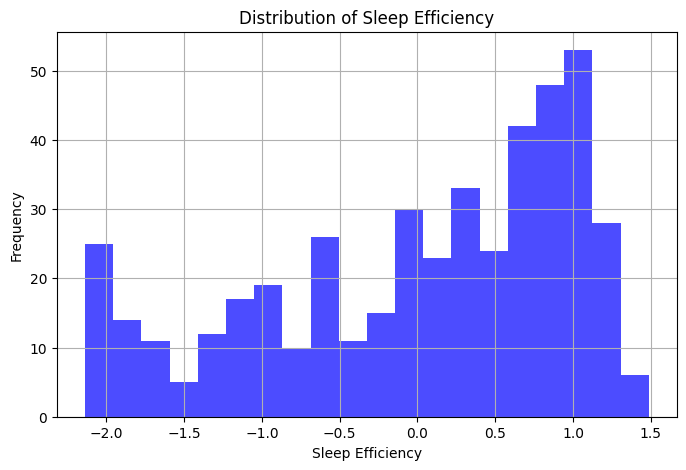

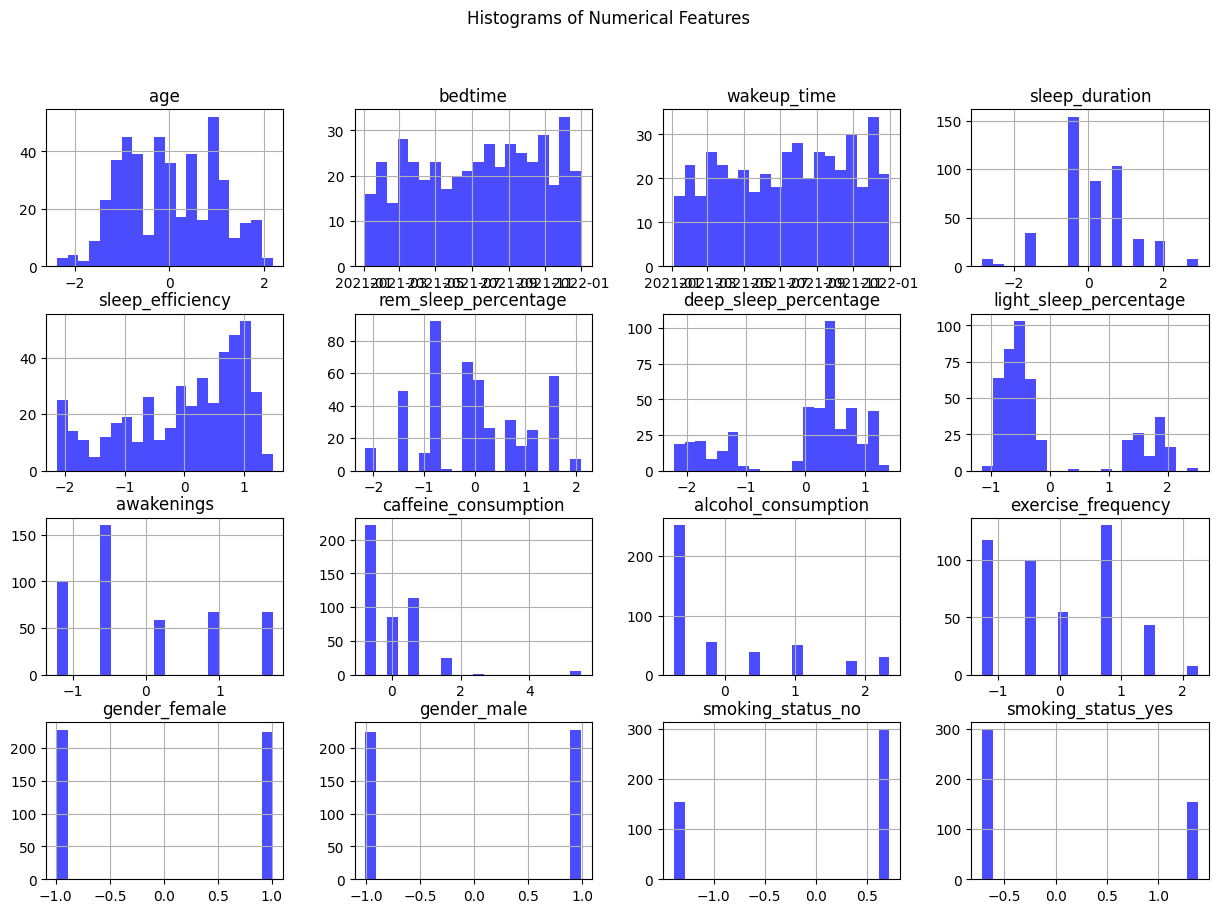

In [15]:
import matplotlib.pyplot as plt

# Plot histogram for a single feature
plt.figure(figsize=(8, 5))
plt.hist(df['sleep_efficiency'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Sleep Efficiency')
plt.xlabel('Sleep Efficiency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histograms for all numerical features
df.hist(bins=20, figsize=(15, 10), color='blue', alpha=0.7)
plt.suptitle('Histograms of Numerical Features')
plt.show()

**Using Box Plots**

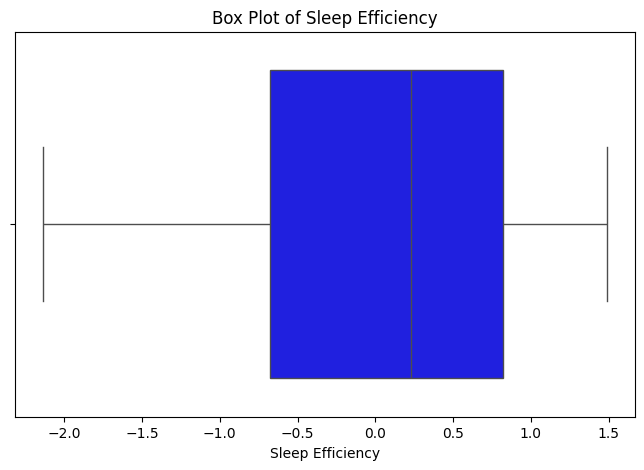

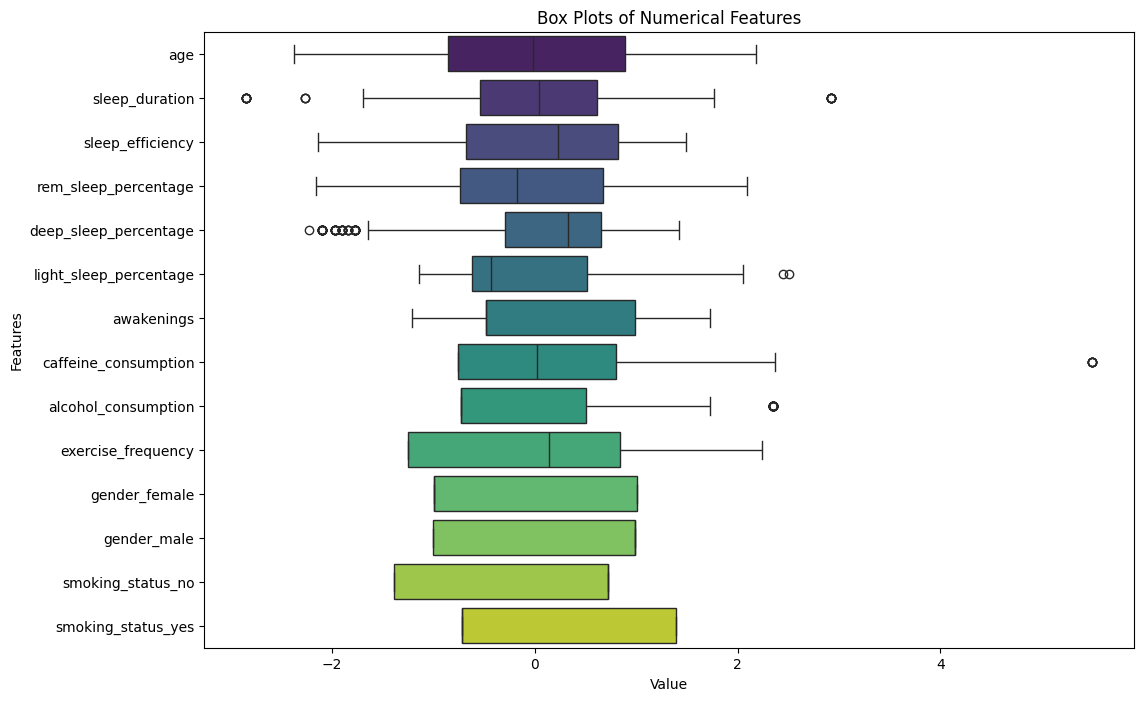

In [45]:
# Plot box plot for a single feature
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['sleep_efficiency'], color='blue')
plt.title('Box Plot of Sleep Efficiency')
plt.xlabel('Sleep Efficiency')
plt.show()

# Plot box plots for all numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), orient='h', palette='viridis')
plt.title('Box Plots of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

**Feature Selection - Part 1**

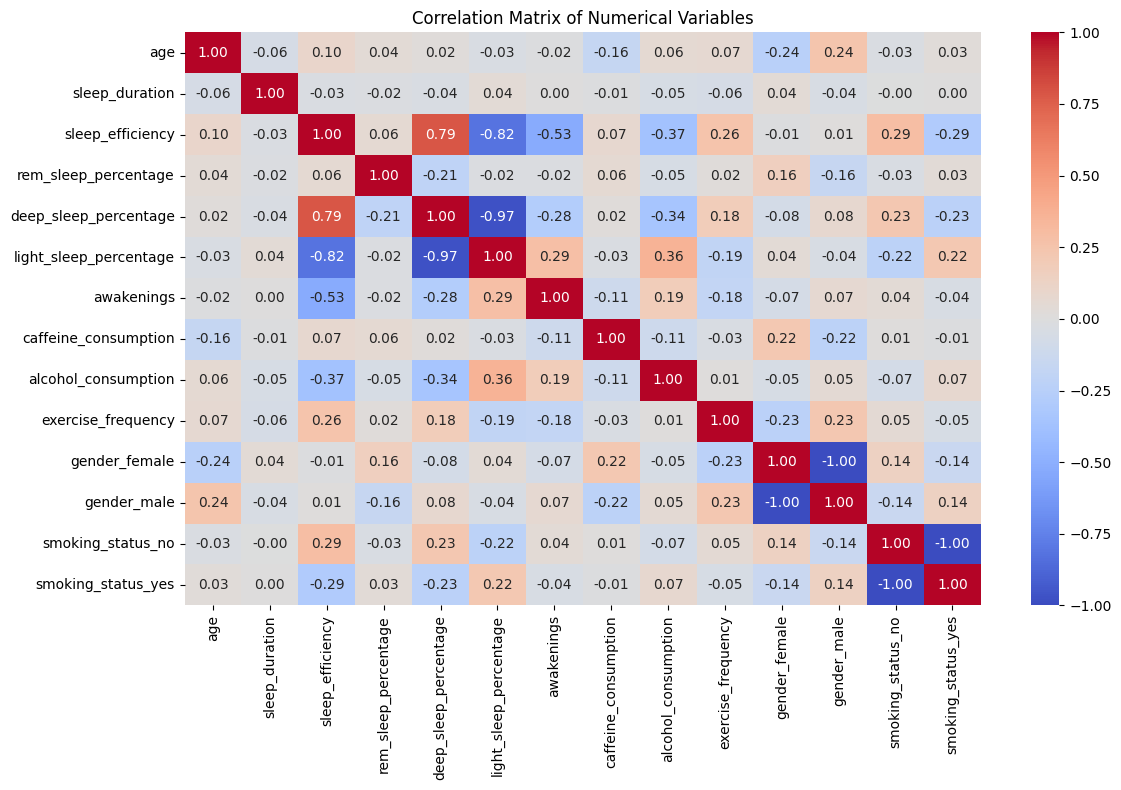


Correlations with Sleep efficiency Score:

sleep_efficiency          1.000000
deep_sleep_percentage     0.787335
smoking_status_no         0.290026
exercise_frequency        0.255953
age                       0.098357
caffeine_consumption      0.071752
rem_sleep_percentage      0.062362
gender_male               0.010062
gender_female            -0.010062
sleep_duration           -0.027467
smoking_status_yes       -0.290026
alcohol_consumption      -0.372177
awakenings               -0.529961
light_sleep_percentage   -0.819204
Name: sleep_efficiency, dtype: float64

Correlations with Deep Sleep Percentage:

deep_sleep_percentage     1.000000
sleep_efficiency          0.787335
smoking_status_no         0.226802
exercise_frequency        0.181551
gender_male               0.075939
age                       0.021730
caffeine_consumption      0.016488
sleep_duration           -0.037304
gender_female            -0.075939
rem_sleep_percentage     -0.208159
smoking_status_yes       -0.226802

In [3]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print correlations with Sleep efficiency
print("\nCorrelations with Sleep efficiency Score:\n")
productivity_correlations = correlation_matrix['sleep_efficiency'].sort_values(ascending=False)
print(productivity_correlations)

# Print correlations with Awakenings
print("\nCorrelations with Deep Sleep Percentage:\n")
productivity_correlations = correlation_matrix['deep_sleep_percentage'].sort_values(ascending=False)
print(productivity_correlations)

# Print correlations with Awakenings
print("\nCorrelations with Light Sleep Percentage:\n")
productivity_correlations = correlation_matrix['light_sleep_percentage'].sort_values(ascending=False)
print(productivity_correlations)

# Print correlations with Awakenings
print("\nCorrelations with Awakenings Score:\n")
productivity_correlations = correlation_matrix['awakenings'].sort_values(ascending=False)
print(productivity_correlations)


---

### **The most important variables influencing:**
- `sleep_efficiency`
- `deep_sleep_percentage`
- `awakenings`

### 1. Sleep Efficiency

**Positive Correlations:**
- Deep sleep percentage: `0.79`
- Exercise frequency: `0.26`
- REM sleep percentage: `0.06` (weak)

**Negative Correlations:**
- Light sleep percentage: `-0.82`
- Awakenings: `-0.53`
- Alcohol consumption: `-0.37`
- Smoking status (yes): `-0.29`

**Low or No Correlation:**
- Age, caffeine, gender, sleep duration

### 2. Deep Sleep Percentage

**Positive Correlations:**
- Sleep efficiency: `0.79`
- Exercise frequency: `0.18`

**Negative Correlations:**
- Light sleep percentage: `-0.97`
- Alcohol consumption: `-0.34`
- Smoking (yes): `-0.23`
- Awakenings: `-0.28`

### Low or No Correlation:
- Age, caffeine, gender

### 3. Awakenings

**Positive Correlations:**
- Light sleep percentage: `0.29`
- Alcohol consumption: `0.19`

**Negative Correlations:**
- Sleep efficiency: `-0.53`
- Deep sleep percentage: `-0.28`
- Exercise frequency: `-0.18`
- Smoking (yes): `-0.07` (weak)

### Low or No Correlation:
- Age, REM sleep %, caffeine, gender

### Summary Table: Which Variables Matter Most?

| Variable             | Affects `sleep_efficiency` | Affects `deep_sleep_percentage` | Affects `awakenings` |
|----------------------|-----------------------------|----------------------------------|------------------------|
| **Sleep efficiency** | —                           | (positive)                    | (negative)          |
| **Deep sleep %**     | (positive)                | —                                | (negative)          |
| **Light sleep %**    | (negative)                | (negative)                    | (positive)          |
| **Awakenings**       | (negative)                | (negative)                    | —                      |
| **Exercise freq.**   | (positive)                | (positive)                    | (negative)          |
| **Alcohol**          | (negative)                | (negative)                    | (positive)          |
| **Smoking (yes)**    | (negative)                | (negative)                    | Slight (negative)      |
| **REM sleep %**      | Slight (positive)           | —                                | —                      |


### Conclusion

- **Light sleep and awakenings** are the clearest indicators of poor sleep quality.
- **Deep sleep, regular exercise, and sleep efficiency** all reinforce each other positively.
- **Alcohol and smoking** are consistently associated with poorer sleep quality across the board.
- **Caffeine, age, gender, and REM sleep** show minimal or inconsistent effects.

---

### **Feature Selection Summary for Sleep Quality Analysis**

Based on the combined analysis of `sleep_efficiency`, `deep_sleep_percentage`, and `awakenings`, we identify which variables are worth keeping and which can be removed due to low impact.

**Key Variables to **Keep** (Strong correlation with at least one target)**

| Variable              | Reason to Keep |
|-----------------------|----------------|
| `sleep_efficiency`    | Target variable / strongly related to others |
| `deep_sleep_percentage` | Strong positive impact on efficiency and negative on awakenings |
| `light_sleep_percentage` | Strong negative effect on efficiency and deep sleep; positive on awakenings |
| `awakenings`          | Strongly lowers efficiency and deep sleep |
| `exercise_frequency`  | Positive effect across all sleep metrics |
| `alcohol_consumption` | Negative effect across the board |
| `smoking_status_yes`  | Negative correlation with efficiency and deep sleep |

**Variables to **Remove** (Low or no impact on targets)**

| Variable               | Reason for Removal |
|------------------------|--------------------|
| `REM_sleep_percentage` | No meaningful correlation with any target (max 0.06) |
| `caffeine_consumption` | Weak or no correlation across the board |
| `age`                  | Minimal influence (correlations between 0.02 and 0.10) |
| `gender_female`        | Very weak correlation (~ -0.01) |
| `gender_male`          | Very weak correlation (~ 0.08) |
| `sleep_duration`       | No impact on efficiency (correlation: -0.03) |
| `smoking_status_no`    | Redundant with `smoking_status_yes` (binary encoding) |


**Splitting Data - Sleep efficiency**

In [4]:
# drop the columns which are not nummeric
df_split = df.drop(columns=['rem_sleep_percentage', 'caffeine_consumption', 'age', 'gender_female', 'gender_male', 'smoking_status_no', 'sleep_duration', 'bedtime', 'wakeup_time'])

# Separate features and target variable
X = df_split.drop(columns=['sleep_efficiency'])  # Assuming 'Sleep efficiency' is the target variable
y = df_split['sleep_efficiency']

# Encode target if needed
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=RANDOM_STATE)

**Classification**

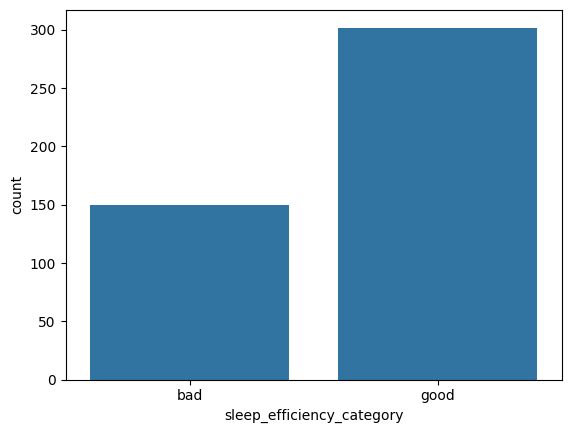

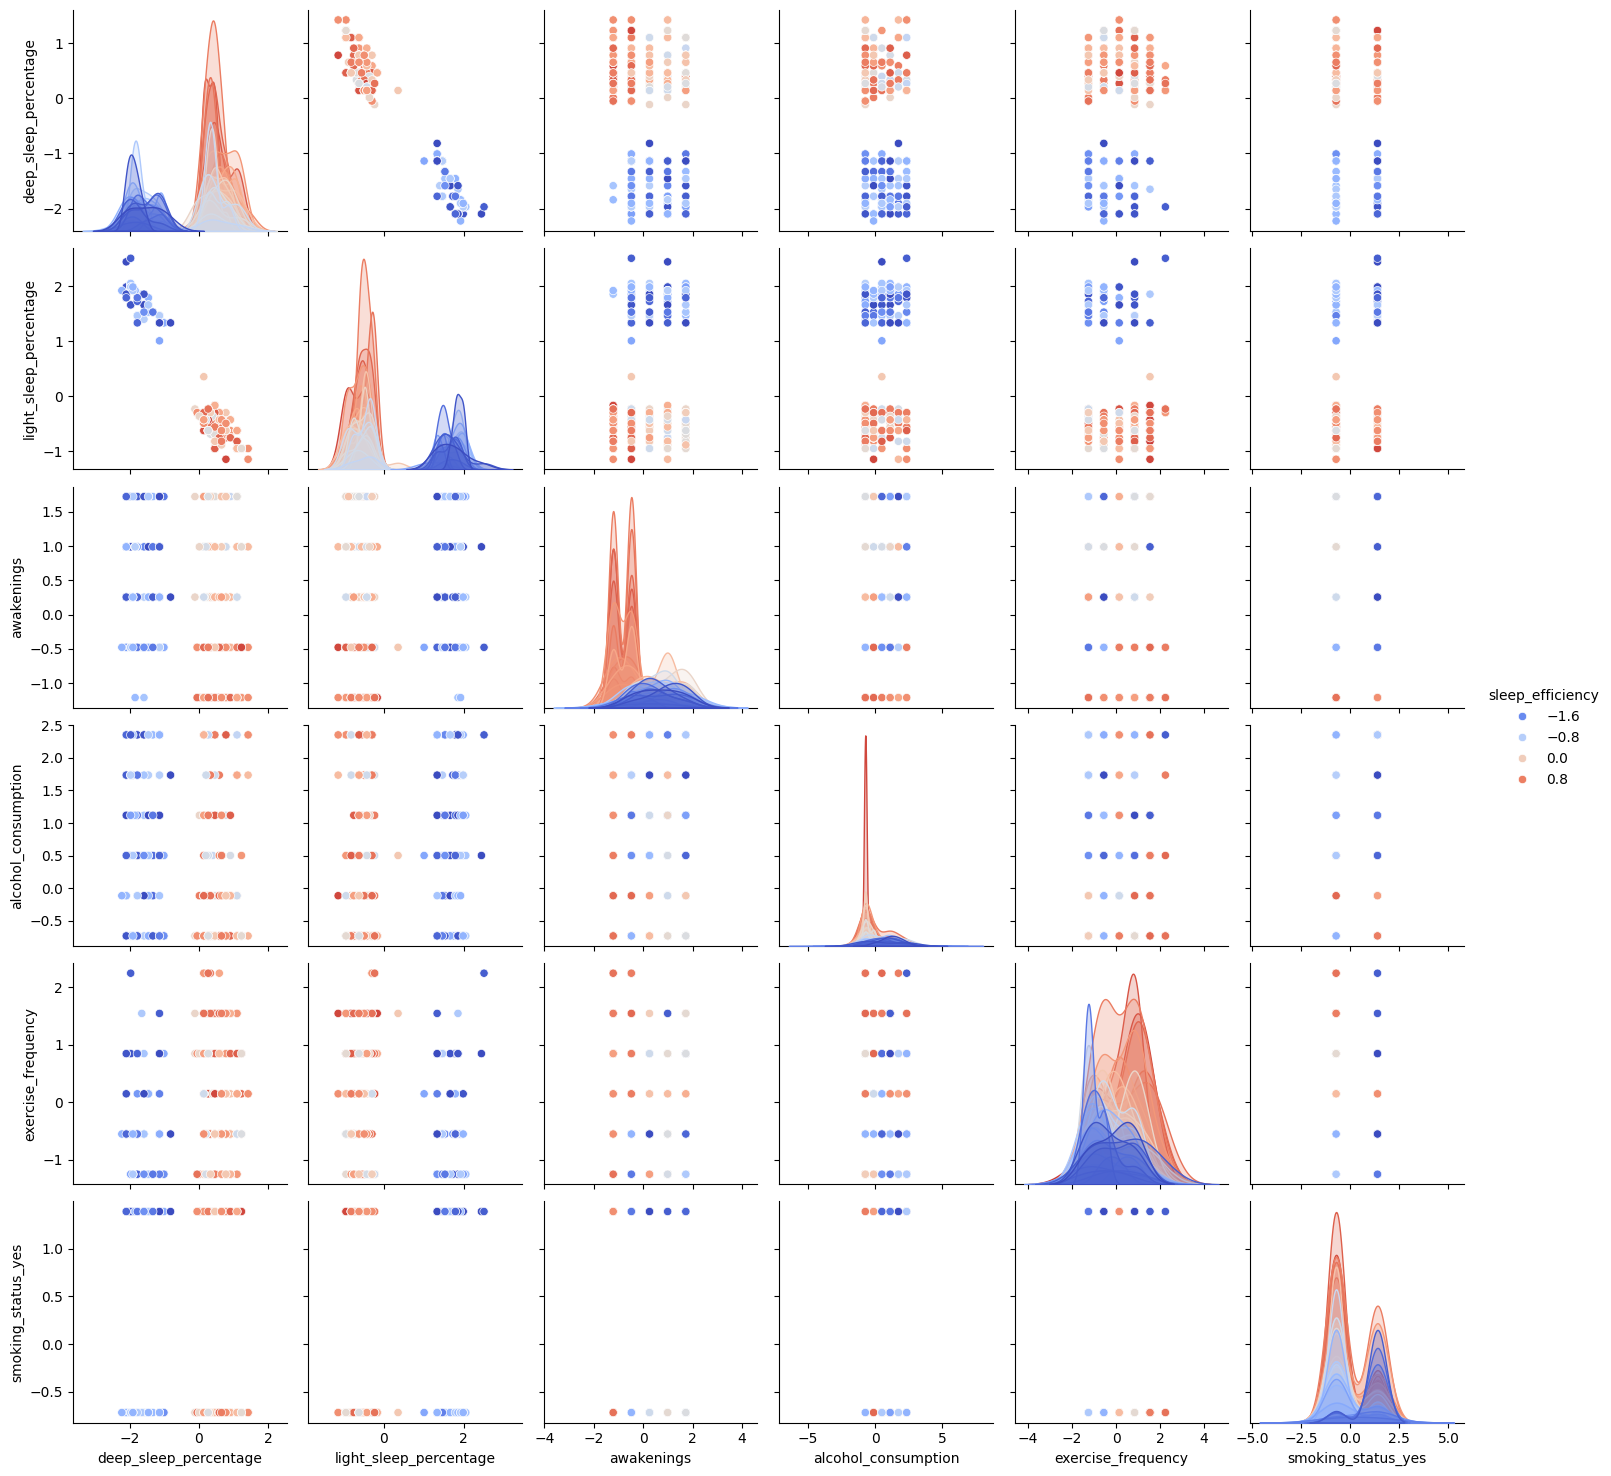

Accuracy: 0.9010989010989011
              precision    recall  f1-score   support

         bad       0.81      0.89      0.85        28
        good       0.95      0.90      0.93        63

    accuracy                           0.90        91
   macro avg       0.88      0.90      0.89        91
weighted avg       0.91      0.90      0.90        91



In [5]:
import copy

# Bin the continuous target variable into discrete classes
df_split_cat = copy.deepcopy(df_split)
df_split_cat['sleep_efficiency_category'] = pd.cut(df_split['sleep_efficiency'], bins=2, labels=['bad', 'good'])

# Visualize target categories of sleep efficiency
sns.countplot(x='sleep_efficiency_category', data=df_split_cat)
plt.show()

# Analyze relationships
sns.pairplot(df_split, hue='sleep_efficiency', palette='coolwarm')
plt.show()

# Update the target variable for classification
y_train_class = pd.cut(y_train, bins=2, labels=['bad', 'good'])
y_test_class = pd.cut(y_test, bins=2, labels=['bad', 'good'])

# Train classification model
model = DecisionTreeClassifier()
model.fit(X_train, y_train_class)

# Evaluate classification model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test_class, y_pred)}")
print(classification_report(y_test_class, y_pred))

---

### **Pairplot Analysis: Sleep Efficiency and Related Factors**

This pairplot visualizes the relationships between several variables, with **`sleep_efficiency`** as the `hue`. Darker points indicate **higher sleep efficiency**, while lighter ones indicate **lower efficiency**.

### **Observations and Insights:**

1. **Deep Sleep vs Light Sleep**
- There is a **clear inverse relationship**: more deep sleep tends to mean less light sleep.
- Higher sleep efficiency is **strongly associated with more deep sleep** and **less light sleep**.

2. **Awakenings**
- Individuals with **fewer awakenings** tend to have **higher sleep efficiency** (darker dots clustered at lower awakening values).
- A visible gradient shows lower efficiency with more frequent awakenings.

3. **Alcohol Consumption**
- Heavier alcohol consumption **slightly associates with lower sleep efficiency**, but the pattern is less strong than for awakenings or deep/light sleep.

4. **Exercise Frequency**
- There's a tendency for individuals who exercise more frequently to have **higher sleep efficiency**.
- The darker dots concentrate towards higher exercise values.

5. **Smoking Status**
- Smokers (`smoking_status_yes = 1`) appear to show a **broader spread in sleep efficiency**, but the pattern is less distinct.
- Possibly slightly lower efficiency overall, but no strong visual separation.


### **Conclusion**

- **Sleep architecture (deep vs light sleep)** is one of the most visually impactful predictors of sleep efficiency.
- **Awakenings** and **exercise frequency** are also clearly linked to better or worse sleep outcomes.
- **Alcohol** and **smoking** may influence sleep efficiency, but their visual signal is weaker and possibly confounded.


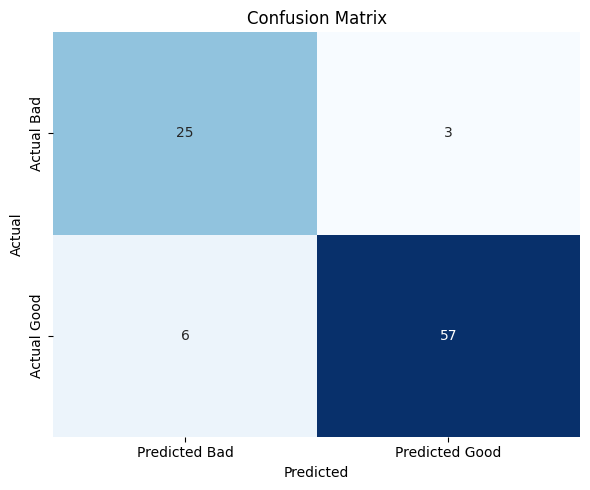

In [6]:
# calculating the confusion matrix
cm = confusion_matrix(y_test_class, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Bad', 'Predicted Good'],
            yticklabels=['Actual Bad', 'Actual Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### **Confusion Matrix**

|                | Predicted Bad | Predicted Good | Total (Actual) |
|----------------|----------------|----------------|----------------|
| **Actual Bad** | **25**         | 3              | 28             |
| **Actual Good**| 6              | **57**         | 63             |

---

### **What the Model Does Well**

- **57 out of 63** "Actual Good" cases were correctly predicted → **~90.5% correct**
- **25 out of 28** "Actual Bad" cases were correctly predicted → **~89.3% correct**
- The model made **only 9 errors** out of **91 total samples**

---

### **Key Metrics**

- **Accuracy**: (25 + 57) / 91 = **0.901** → **90.1%**
- **Precision (Good)**: 57 / (57 + 3) = **0.95**
- **Recall (Good)**: 57 / (57 + 6) = **0.905**
- **F1-score (Good)**: ≈ **0.927**

---

### **Conclusion**

- The model performs **very well** and is **well-balanced** between both classes.
- Overall accuracy is around **90%**.
- Only a small area for improvement remains, mostly in reducing **false negatives** for the "Good" class.



**Hyperparameter Tuning**

In [7]:
# Hyperparameter tuning with Decision Tree 
param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train_class)
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 3}


In [8]:
# Hyperparameter tuning with RandomForest
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train_class)
print(grid.best_params_)

{'max_depth': 5, 'n_estimators': 100}


**Regression**

In [18]:
# Simple Linear Regressor
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Simple Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Standard Scaling + Linear Regressor
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Standard Scaling + Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Normalizer + Linear Regressor
model = make_pipeline(Normalizer(), LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Normalizer + Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Ridge Regression
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Ridge Regression): {mean_squared_error(y_test, y_pred)}")

# Lasso Regression
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Lasso Regression): {mean_squared_error(y_test, y_pred)}")

# ElasticNet Regression
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (ElasticNet Regression): {mean_squared_error(y_test, y_pred)}")

# Simple Polynomial Linear Regressor
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)
print(f"Mean Squared Error (Simple Polynomial Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Ridge Polynomial Linear Regressor
model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Ridge Polynomial Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Lasso Polynomial Linear Regressor
model = make_pipeline(PolynomialFeatures(degree=2), Lasso())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Lasso Polynomial Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# ElasticNet Polynomial Linear Regressor
model = make_pipeline(PolynomialFeatures(degree=2), ElasticNet())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (ElasticNet Polynomial Linear Regressor): {mean_squared_error(y_test, y_pred)}")

# Gradient boosting
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Gradient boosting Regressor): {mean_squared_error(y_test, y_pred)}")

# Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Mean Squared Error (Random Forest Regressor): {mean_squared_error(y_test, y_pred)}")

Mean Squared Error (Simple Linear Regressor): 38.9192165932953
Mean Squared Error (Standard Scaling + Linear Regressor): 38.91921659329533
Mean Squared Error (Normalizer + Linear Regressor): 41.944935945869915
Mean Squared Error (Ridge Regression): 39.33886206953295
Mean Squared Error (Lasso Regression): 45.922257338339485
Mean Squared Error (ElasticNet Regression): 52.899565844330496
Mean Squared Error (Simple Polynomial Linear Regressor): 35.48579786319054
Mean Squared Error (Ridge Polynomial Linear Regressor): 35.29192641286531
Mean Squared Error (Lasso Polynomial Linear Regressor): 43.10160689197601
Mean Squared Error (ElasticNet Polynomial Linear Regressor): 45.79505862759117
Mean Squared Error (Gradient boosting Regressor): 27.04420928170234
Mean Squared Error (Random Forest Regressor): 30.546060934726274


### Conclusion: Regression Model Comparison

### Best Performing Models:

- **Gradient Boosting Regressor**
  - **MSE ≈ 27.04**
  - Strongest performance overall. It’s like the model actually *tried*. Excellent at capturing complex patterns without overfitting.

- **Random Forest Regressor**
  - **MSE ≈ 30.55**
  - Another ensemble method showing solid results. Slightly worse than Gradient Boosting, but still a major upgrade from linear models.

### Polynomial Models (Classic but Curvy):

- **Ridge Polynomial Linear Regression**
  - **MSE ≈ 35.29**
  - Best among the traditional regression models. Shows polynomial features + Ridge regularization can work well.

- **Simple Polynomial Linear Regression**
  - **MSE ≈ 35.49**
  - Performs almost as well, though lacks Ridge's slight regularization edge.

### Standard Linear Models:

- **Simple Linear Regression** / **Standard Scaled Linear Regression**
  - **MSE ≈ 38.92**
  - Identical performance. Scaling did absolutely nothing. Like moisturizing a cactus.

- **Ridge Regression (no polynomial)**
  - **MSE ≈ 39.34**
  - Slight improvement in regularization, but still behind polynomial or ensemble models.

- **Normalizer + Linear Regression**
  - **MSE ≈ 41.94**
  - Worse than the others. Normalizing made it weird. Think of it as giving your model vertigo.

### Final Recommendation:

For accuracy, go with:
- **Gradient Boosting Regressor** (best performance overall)
- Or **Random Forest Regressor** (if you want great performance with less risk of overfitting)

As the base regression:
- **Ridge Polynomial Linear Regression** is your next best option.

Avoid Lasso and ElasticNet.

